In [3]:
import lstm

Using TensorFlow backend.


In [4]:
import time

In [5]:
import matplotlib.pyplot as plt

In [6]:
def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.show()

In [7]:
epoch = 10
seq_len = 50

In [8]:
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', seq_len, True)

In [9]:
# ネットワークモデルを作成する 1層目(1)、2層目(50)、3層目(100)、4層目(1)
model = lstm.build_model([1, 50, 100, 1])

 実行時間：　 0.00800013542175293


In [10]:
model.fit(X_train, y_train, batch_size=512, nb_epoch=epoch, validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/10
3523/3523 [==============================] - 3s 757us/step - loss: 0.0021 - val_loss: 5.4081e-04
Epoch 2/10
3523/3523 [==============================] - 2s 573us/step - loss: 8.2965e-04 - val_loss: 6.3217e-04
Epoch 3/10
3523/3523 [==============================] - 2s 558us/step - loss: 6.5810e-04 - val_loss: 5.0008e-04
Epoch 4/10
3523/3523 [==============================] - 2s 555us/step - loss: 6.4321e-04 - val_loss: 5.1122e-04
Epoch 5/10
3523/3523 [==============================] - 2s 563us/step - loss: 5.9064e-04 - val_loss: 4.0239e-04
Epoch 6/10
3523/3523 [==============================] - 2s 551us/step - loss: 6.1814e-04 - val_loss: 4.7710e-04
Epoch 7/10
3523/3523 [==============================] - 2s 559us/step - loss: 5.0701e-04 - val_loss: 3.8042e-04
Epoch 8/10
3523/3523 [==============================] - 2s 572us/step - loss: 5.0135e-04 - val_loss: 6.1538e-04
Epoch 9/10
3523/3523 [==============================] - 2s 55

In [11]:
predictions = lstm.predict_sequences_multiple(model, X_test, seq_len, 50)

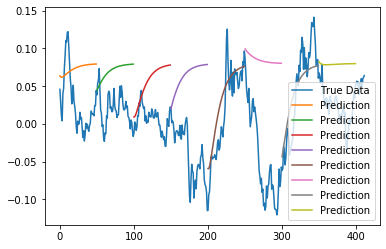

In [12]:
plot_results_multiple(predictions, y_test, 50)